## Import libs

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



## Preparing the data

In [ ]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((33265, 4), (7130, 4), (7129, 4), (33265, 1), (7130, 1), (7129, 1))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.transform(y_val)
y_test_scaled = scaler.transform(y_test)

y_train_arr = np.array(y_train_scaled).flatten()
y_val_arr = np.array(y_val_scaled).flatten()
y_test_arr = np.array(y_test_scaled).flatten()

# For polynomial:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

scaler_p = StandardScaler()
X_poly_scaled = scaler_p.fit_transform(X_poly)
X_poly_val_scaled = scaler_p.transform(X_val_poly)
X_poly_test_scaled = scaler_p.transform(X_test_poly)

y_poly_train_scaled = scaler_p.fit_transform(y_train)
y_poly_val_scaled = scaler_p.transform(y_val)
y_poly_test_scaled = scaler_p.transform(y_test)

y_poly_train_arr = np.array(y_poly_train_scaled).flatten()
y_poly_val_arr = np.array(y_poly_val_scaled).flatten()
y_poly_test_arr = np.array(y_poly_test_scaled).flatten()

## Train and Valid model

### Different cost functions

In [ ]:
class CustomLinearRegression:
    def __init__(self, alpha=0.0001, lamda=0, ls=False):
        self.alpha = alpha
        self.lamda = lamda
        self.ls = ls

    def predict(self, X):
        return np.dot(X, self.theta) + self.bias

    def cost_mse(self, y, y_pred):
        return (1 / (2 * len(y))) * np.sum((y_pred - y) ** 2)

    def cost_ls(self, y, y_pred):
        return (1 / 2) * np.sum((y_pred - y) ** 2)

    def cost_mse_with_r(self, y, y_pred):
        return self.cost_mse(y, y_pred) + (self.lamda * np.sum(self.theta ** 2))

    def compute_gradient(self, y_pred, X, y):
        grad_theta = (1 / len(y)) * np.dot(X.T, y_pred - y)
        grad_bias = (1 / len(y)) * np.sum(y_pred - y)
        return grad_theta, grad_bias

    def optimize(self, theta, grad_theta, bias, grad_bias):
        updated_theta = theta - self.alpha * grad_theta
        updated_bias = bias - self.alpha * grad_bias
        return updated_theta, updated_bias

    def fit_with_validation(self, X, y, X_val, y_val):
      n_features = X.shape[1]
      self.theta = np.random.randn(n_features) * 0.01
      self.bias = 0
      train_loss = []
      val_loss = []

      for i in range(1000):
        y_pred = self.predict(X)
        cost = self.cost_ls(y, y_pred) if self.ls else self.cost_mse(y, y_pred)

        cost = self.cost_ls(y, y_pred) if self.ls else self.cost_mse_with_r(y, y_pred) if self.lamda>0 else self.cost_mse(y, y_pred)
        train_loss.append(cost)

        grad_theta, grad_bias = self.compute_gradient(y_pred, X, y)
        self.theta, self.bias = self.optimize(self.theta, grad_theta, self.bias, grad_bias)

        if X_val is not None and y_val is not None:
            val_pred = self.predict(X_val)
            val_cost = self.cost_ls(y_val, val_pred) if self.ls else self.cost_mse_with_r(y_val, val_pred) if self.lamda>0 else self.cost_mse(y_val, val_pred)
            val_loss.append(val_cost)

        if i % 100 == 0:
          print(f'Epoch {i}, train loss: {cost:.4f}, val loss: {val_cost:.4f}')

      return train_loss, val_loss


In [ ]:
model_ls = CustomLinearRegression(ls=True)
train_loss_ls, val_loss_ls = model_ls.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model_mse = CustomLinearRegression()
train_loss_mse, val_loss_mse = model_mse.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

Epoch 0, train loss: 17285.9098, val loss: 3685.0688
Epoch 100, train loss: 16189.8648, val loss: 3448.9182
Epoch 200, train loss: 15177.4966, val loss: 3230.8590
Epoch 300, train loss: 14242.4156, val loss: 3029.5074
Epoch 400, train loss: 13378.7204, val loss: 2843.5853
Epoch 500, train loss: 12580.9600, val loss: 2671.9123
Epoch 600, train loss: 11844.0997, val loss: 2513.3982
Epoch 700, train loss: 11163.4893, val loss: 2367.0361
Epoch 800, train loss: 10534.8337, val loss: 2231.8962
Epoch 900, train loss: 9954.1657, val loss: 2107.1195
Epoch 0, train loss: 0.5051, val loss: 0.5022
Epoch 100, train loss: 0.4733, val loss: 0.4702
Epoch 200, train loss: 0.4439, val loss: 0.4407
Epoch 300, train loss: 0.4167, val loss: 0.4134
Epoch 400, train loss: 0.3917, val loss: 0.3882
Epoch 500, train loss: 0.3685, val loss: 0.3650
Epoch 600, train loss: 0.3471, val loss: 0.3435
Epoch 700, train loss: 0.3273, val loss: 0.3237
Epoch 800, train loss: 0.3091, val loss: 0.3054
Epoch 900, train loss: 

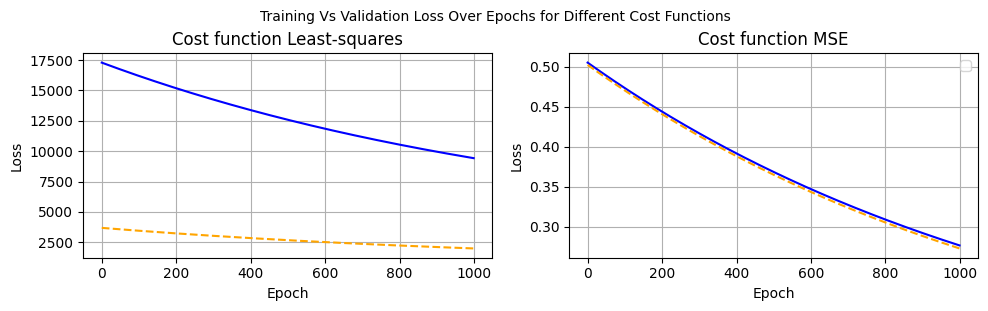

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(train_loss_ls, color="blue")
axs[0].plot(val_loss_ls, color="orange", linestyle="--")
axs[0].set_title("Cost function Least-squares")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].grid(True)

axs[1].plot(train_loss_mse, color="blue")
axs[1].plot(val_loss_mse, color="orange", linestyle="--")
axs[1].set_title("Cost function MSE")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].grid(True)


plt.tight_layout()
plt.suptitle("Training Vs Validation Loss Over Epochs for Different Cost Functions", fontsize=10, y=1.02)
plt.legend()
plt.show()

### Different alpha (learning rate) values

In [ ]:
model0 = CustomLinearRegression(alpha=0.0001)
train_loss_model0, val_loss_model0 = model0.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model1 = CustomLinearRegression(alpha=0.001)
train_loss_model1, val_loss_model1 = model1.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model2 = CustomLinearRegression(alpha=0.01)
train_loss_model2, val_loss_model2 = model2.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model3 = CustomLinearRegression(alpha=0.1)
train_loss_model3, val_loss_model3 = model3.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model4 = CustomLinearRegression(alpha=1)
train_loss_model4, val_loss_model4 = model4.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model5 = CustomLinearRegression(alpha=10)
train_loss_model5, val_loss_model5 = model5.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model6 = CustomLinearRegression(alpha=100)
train_loss_model6, val_loss_model6 = model6.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)


Epoch 0, train loss: 0.5073, val loss: 0.5045
Epoch 100, train loss: 0.4753, val loss: 0.4723
Epoch 200, train loss: 0.4457, val loss: 0.4425
Epoch 300, train loss: 0.4184, val loss: 0.4151
Epoch 400, train loss: 0.3931, val loss: 0.3897
Epoch 500, train loss: 0.3698, val loss: 0.3663
Epoch 600, train loss: 0.3483, val loss: 0.3447
Epoch 700, train loss: 0.3284, val loss: 0.3248
Epoch 800, train loss: 0.3100, val loss: 0.3063
Epoch 900, train loss: 0.2931, val loss: 0.2893
Epoch 0, train loss: 0.5268, val loss: 0.5208
Epoch 100, train loss: 0.2858, val loss: 0.2806
Epoch 200, train loss: 0.1770, val loss: 0.1726
Epoch 300, train loss: 0.1279, val loss: 0.1242
Epoch 400, train loss: 0.1057, val loss: 0.1025
Epoch 500, train loss: 0.0956, val loss: 0.0928
Epoch 600, train loss: 0.0911, val loss: 0.0885
Epoch 700, train loss: 0.0890, val loss: 0.0866
Epoch 800, train loss: 0.0880, val loss: 0.0857
Epoch 900, train loss: 0.0875, val loss: 0.0853
Epoch 0, train loss: 0.4880, val loss: 0.454

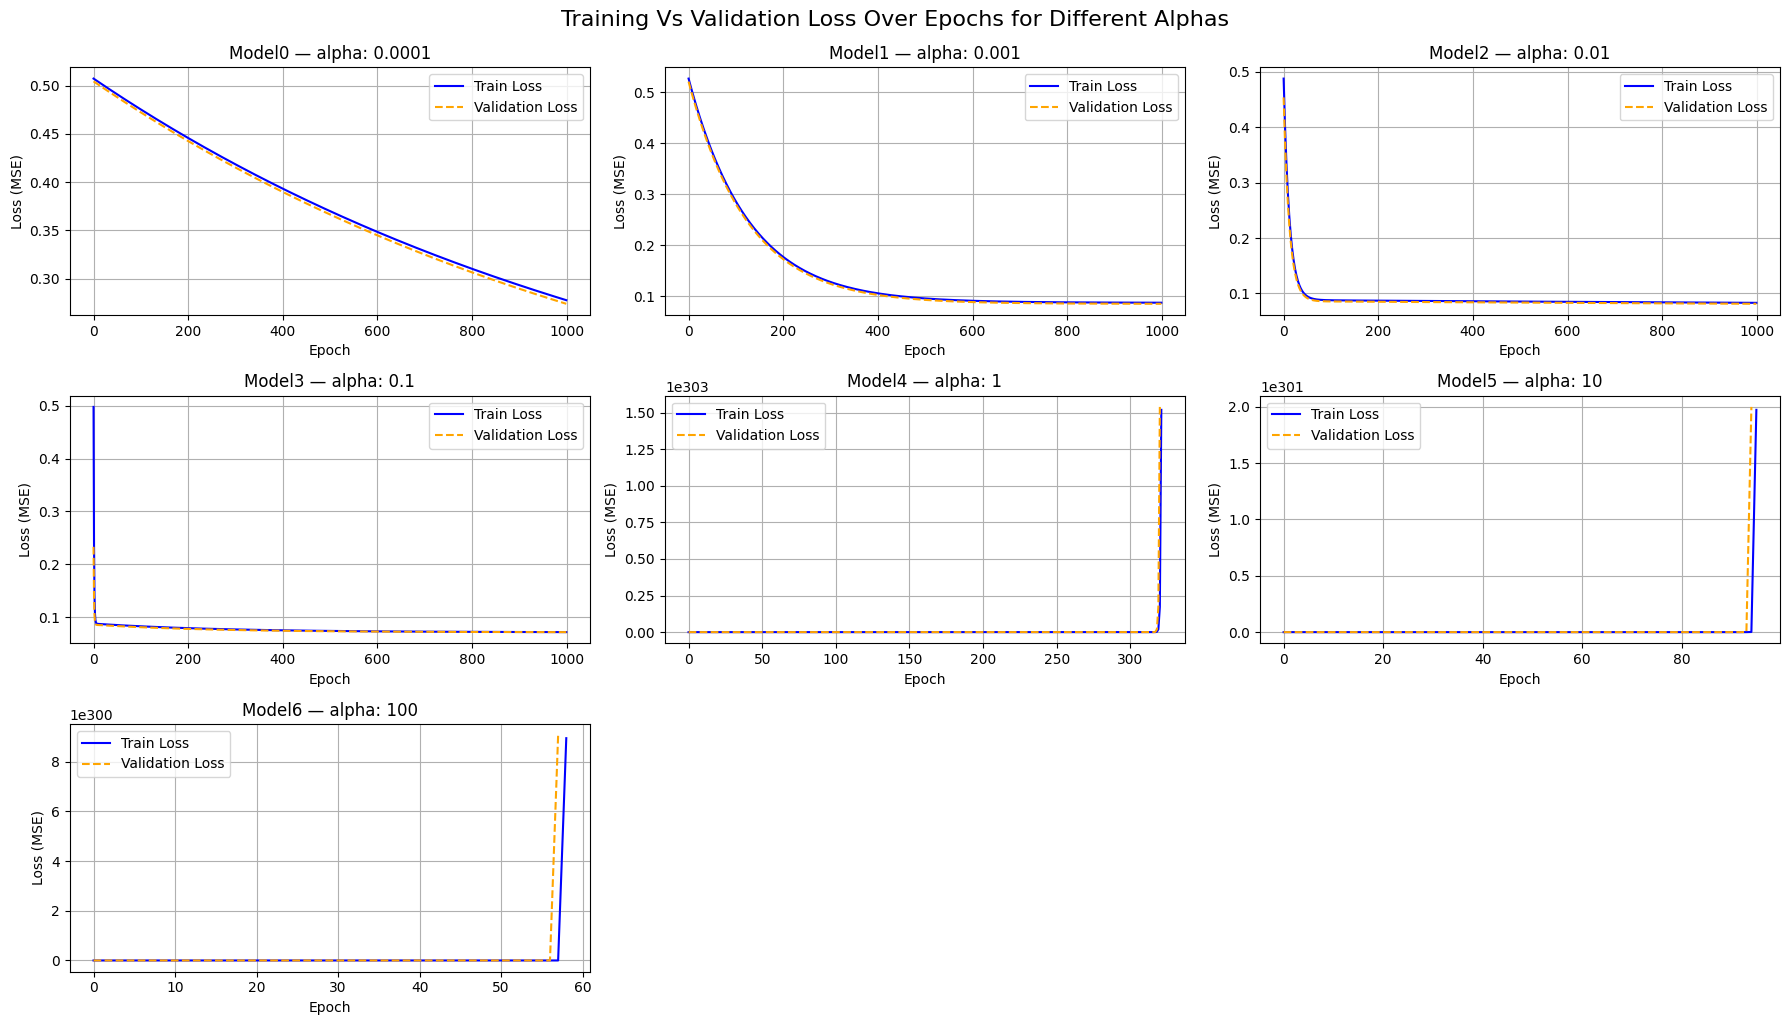

In [ ]:
num_plots = 7
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

for i in range(num_plots):
    model = globals()[f"model{i}"]
    train_loss = globals()[f"train_loss_model{i}"]
    val_loss = globals()[f"val_loss_model{i}"]

    alpha_ = model.alpha
    ax = axes[i]

    ax.plot(train_loss, label="Train Loss", color="blue")
    ax.plot(val_loss, label="Validation Loss", color="orange", linestyle="--")

    ax.set_title(f"Model{i} — alpha: {alpha_}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss (MSE)")
    ax.grid(True)
    ax.legend()

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Training Vs Validation Loss Over Epochs for Different Alphas", fontsize=16, y=1.02)
plt.show()


### Different lamda (regularization) values

In [ ]:
##### choose alpha 0.1

model7 = CustomLinearRegression(alpha=0.1, lamda=0)
train_loss_model7, val_loss_model7 = model7.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model8 = CustomLinearRegression(alpha=0.1, lamda=0.0001)
train_loss_model8, val_loss_model8 = model8.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model9 = CustomLinearRegression(alpha=0.1, lamda=0.01)
train_loss_model9, val_loss_model9 = model9.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

model10 = CustomLinearRegression(alpha=0.1, lamda=1)
train_loss_model10, val_loss_model10 = model10.fit_with_validation(X_train_scaled, y_train_arr, X_val_scaled, y_val_arr)

Epoch 0, train loss: 0.5129, val loss: 0.2388
Epoch 100, train loss: 0.0829, val loss: 0.0812
Epoch 200, train loss: 0.0794, val loss: 0.0780
Epoch 300, train loss: 0.0770, val loss: 0.0758
Epoch 400, train loss: 0.0753, val loss: 0.0744
Epoch 500, train loss: 0.0741, val loss: 0.0734
Epoch 600, train loss: 0.0733, val loss: 0.0728
Epoch 700, train loss: 0.0727, val loss: 0.0724
Epoch 800, train loss: 0.0724, val loss: 0.0721
Epoch 900, train loss: 0.0721, val loss: 0.0720
Epoch 0, train loss: 0.5019, val loss: 0.2345
Epoch 100, train loss: 0.0826, val loss: 0.0809
Epoch 200, train loss: 0.0792, val loss: 0.0778
Epoch 300, train loss: 0.0769, val loss: 0.0758
Epoch 400, train loss: 0.0753, val loss: 0.0744
Epoch 500, train loss: 0.0742, val loss: 0.0735
Epoch 600, train loss: 0.0734, val loss: 0.0729
Epoch 700, train loss: 0.0729, val loss: 0.0725
Epoch 800, train loss: 0.0725, val loss: 0.0723
Epoch 900, train loss: 0.0722, val loss: 0.0721
Epoch 0, train loss: 0.4663, val loss: 0.222

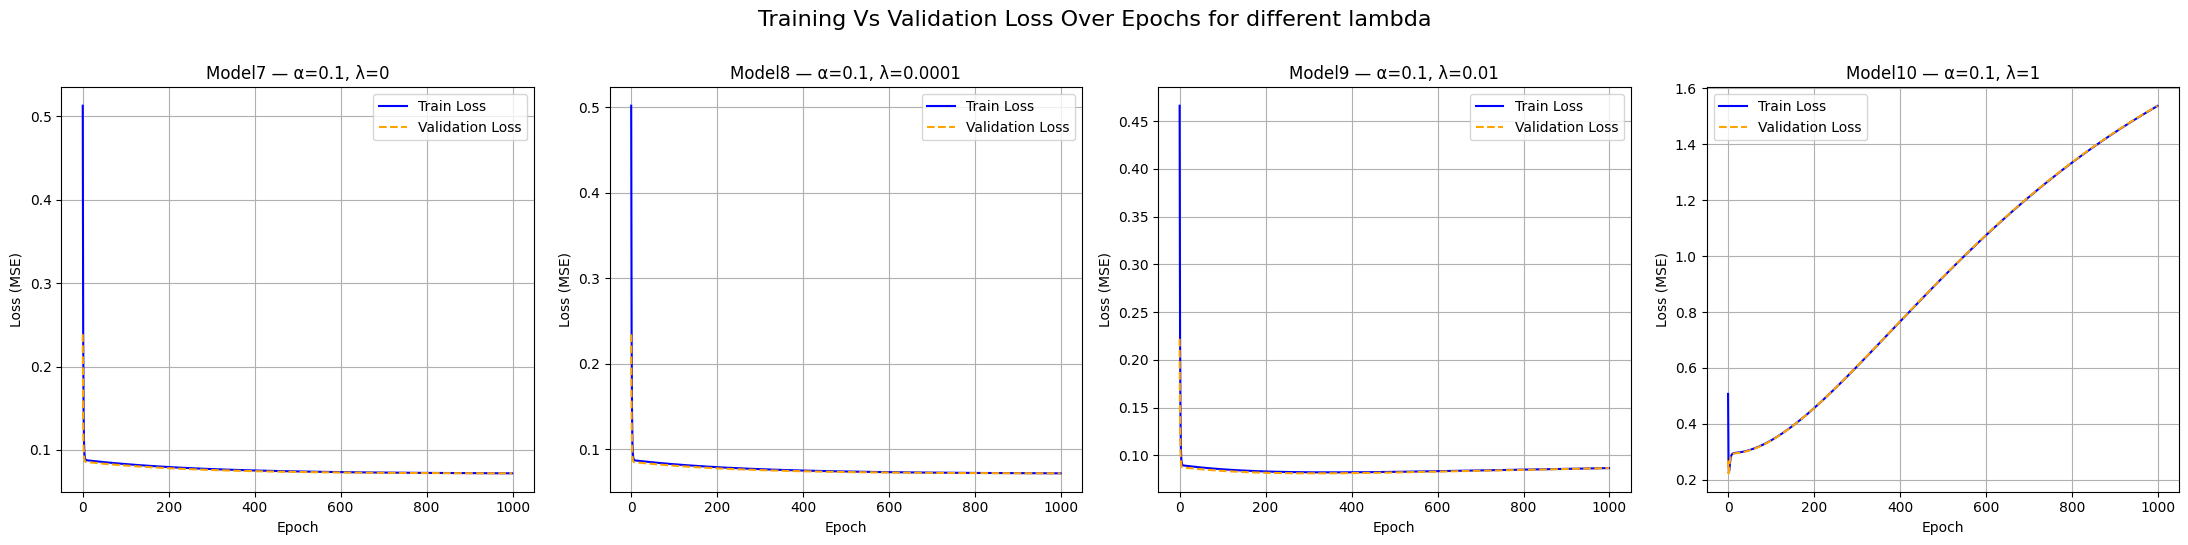

In [ ]:
num_plots = 4
cols = 4
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(22, 5))
axes = axes.flatten()

for idx, i in enumerate(range(7, 11)):
    model = globals()[f"model{i}"]
    alpha_ = model.alpha
    lamda_ = model.lamda
    train_loss = globals()[f"train_loss_model{i}"]
    val_loss = globals()[f"val_loss_model{i}"]

    ax = axes[idx]
    ax.plot(train_loss, label="Train Loss", color="blue")
    ax.plot(val_loss, label="Validation Loss", color="orange", linestyle="--")

    ax.set_title(f"Model{i} — α={alpha_}, λ={lamda_}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss (MSE)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.suptitle("Training Vs Validation Loss Over Epochs for different lambda", fontsize=16, y=1.08)
plt.show()


In [ ]:
# Polynomial:
model_poly = CustomLinearRegression(alpha=0.1, lamda=0.01)
train_loss_model_poly, val_loss_model_poly = model_poly.fit_with_validation(X_poly_scaled, y_poly_train_arr, X_poly_val_scaled, y_poly_val_arr)

Epoch 0, train loss: 0.4686, val loss: 0.1382
Epoch 100, train loss: 0.0728, val loss: 0.0734
Epoch 200, train loss: 0.0726, val loss: 0.0736
Epoch 300, train loss: 0.0726, val loss: 0.0736
Epoch 400, train loss: 0.0726, val loss: 0.0736
Epoch 500, train loss: 0.0726, val loss: 0.0737
Epoch 600, train loss: 0.0726, val loss: 0.0737
Epoch 700, train loss: 0.0727, val loss: 0.0738
Epoch 800, train loss: 0.0728, val loss: 0.0738
Epoch 900, train loss: 0.0729, val loss: 0.0739


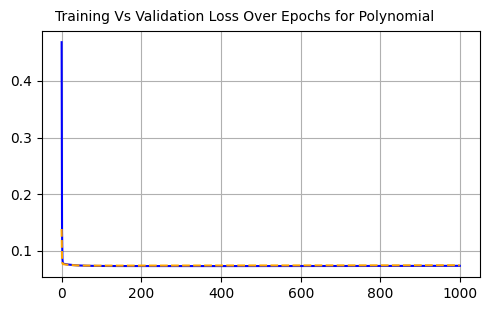

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(train_loss_model_poly, color="blue")
plt.plot(val_loss_model_poly, color="orange", linestyle="--")
plt.grid(True)

plt.tight_layout()
plt.suptitle("Training Vs Validation Loss Over Epochs for Polynomial", fontsize=10, y=1.02)
plt.show()

## Testing

In [ ]:
# my custom model
y_pred_scaled = model10.predict(X_test_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Scikit-learn model
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
y_pred_sklearn = sk_model.predict(X_test)

# another regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

y_pred_poly_scaled = model_poly.predict(X_poly_test_scaled)
y_pred_poly_scaled = y_pred_poly_scaled.reshape(-1, 1)
y_pred_poly = scaler_p.inverse_transform(y_pred_poly_scaled).flatten()

y_actual = np.array(y_test).flatten()

In [ ]:
results = pd.DataFrame({'Actual': y_actual, 'Pred': y_pred.flatten(), 'Pred Poly': y_pred_poly})
print(results)

      Actual         Pred    Pred Poly
0       2396  3023.436448  2961.434637
1      11540  8780.978009  8891.318572
2       4779  5081.020505  5031.738272
3       3334  3471.695591  3414.343409
4       3005  3094.768137  3117.409666
...      ...          ...          ...
7124    1174   684.089446   745.815118
7125     458   331.936227   386.372236
7126    1005  1514.476016  1359.664667
7127    1584  2610.166591  2525.946884
7128    1160  1692.288001  1718.343734

[7129 rows x 3 columns]


In [ ]:
custom_mse = mean_squared_error(y_test, y_pred)
sklearn_mse = mean_squared_error(y_test, y_pred_sklearn)
rf_mse = mean_squared_error(y_test, rf_pred)
custom_poly_mse = mean_squared_error(y_actual, y_pred_poly)

custom_r2 = r2_score(y_test, y_pred)
sklearn_r2 = r2_score(y_test, y_pred_sklearn)
rf_r2 = r2_score(y_test, rf_pred)
custom_poly_r2 = r2_score(y_actual, y_pred_poly)

In [ ]:
mse_results = pd.DataFrame({
    'Model': ['Custom', 'Sklearn', 'Random Forest', 'Custom Poly'],
    'MSE': [custom_mse, sklearn_mse, rf_mse, custom_poly_mse],
    'R²': [custom_r2, sklearn_r2, rf_r2, custom_poly_r2]
})

print(mse_results)

           Model           MSE        R²
0         Custom  1.066242e+06  0.859458
1        Sklearn  1.052307e+06  0.861295
2  Random Forest  1.071953e+06  0.858705
3    Custom Poly  1.041875e+06  0.862670


### Residual plots

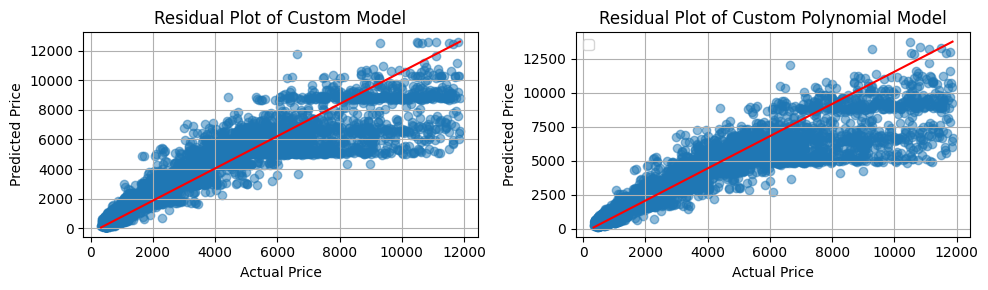

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].scatter(y_actual, y_pred, alpha=0.5)
axs[0].set_title("Residual Plot of Custom Model")
axs[0].set_xlabel("Actual Price")
axs[0].set_ylabel("Predicted Price")
axs[0].plot([y_actual.min(), y_actual.max()], [y_pred.min(), y_pred.max()], color='red')  # y=x line
axs[0].grid(True)

axs[1].scatter(y_actual, y_pred_poly, alpha=0.5)
axs[1].set_title("Residual Plot of Custom Polynomial Model")
axs[1].set_xlabel("Actual Price")
axs[1].set_ylabel("Predicted Price")
axs[1].plot([y_actual.min(), y_actual.max()], [y_pred_poly.min(), y_pred_poly.max()], color='red')  # y=x line
axs[1].grid(True)


plt.tight_layout()
plt.legend()
plt.show()